<a href="https://colab.research.google.com/github/BYADAMREDDY/HDS-Capstone/blob/main/src/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

We will begin by consolidating the data into a single, reusable dataset. To do this, we first need to identify and select the relevant columns. Understanding the purpose of each column is essential, and for that, we refer to the metadata provided in PDF documents. To extract meaningful information from these PDFs—such as column names and their descriptions—we developed a script that converts this information into a structured JSON format. This JSON helps us understand the dataset more easily, enabling us to choose the appropriate input and target variables. Once the selection is complete, we will normalize the column names and store the data as a unified dataset, which will then be used for exploratory data analysis (EDA).

In [ ]:
# lets initailly start by combing the dataset to single reusable dataset, this requires us to first figure out or select what columns we need
# the columns description is required for us to understand what data is all about for which we have metadata PDF's
# for understanding metadata PDF's we wrote a pdf extractor script which basically forms extracts the required column name and description from PDF
# we will use this JSON to easily understand what columns to what and later select all the candidate columns as input variables and also target variables
# and finally normalize the dataset column names and store as single dataset which we will use to perfrom EDA

In [ ]:
df = pd.read_csv("/content/combined_df.csv") # loading the CSV

In [ ]:
df.head() # try to see the head

,DEPEV_A,DEPMED_A,SEX_A,CANEV_A,BLADDCAN_A,BLADDAGETC_A,BLOODCAN_A,BLOODAGETC_A,BONECAN_A,BONEAGETC_A,...,OTHERAGETC_A,NUMCAN_A,AGEP_A,EDUC_A,POVRATTC_A,ANXEV_A,PAIPHYSTPY_A,UPPSLFCR_A,RECTYPE,SRVY_YR
0,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,97,7.0,2.96,2,2.0,1,10,2019
1,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,28,6.0,2.97,2,NaN,1,10,2019
2,2,2,1,1,1.0,62.0,2.0,NaN,2.0,NaN,...,NaN,1,72,5.0,4.28,2,2.0,1,10,2019
3,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,60,7.0,7.13,2,2.0,1,10,2019
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,60,5.0,1.13,1,2.0,1,10,2019


In [ ]:
df.shape # what is the shape of the loaded dataframe

(150220, 73)

In [ ]:
column_info = [
  {
    "column_name": "DEPEV_A",
    "column_description": "Ever had depression"
  },
  {
    "column_name": "DEPMED_A",
    "column_description": "Take medication for depression"
  },
  {
    "column_name": "SEX_A",
    "column_description": "Sex of Sample Adult"
  },
  {
      "column_name": "CANEV_A",
      "column_description": "Ever been told you had cancer"
  },
  {
      "column_name": "BLADDCAN_A",
      "column_description": "Bladder cancer mentioned"
  },
  {
      "column_name": "BLADDAGETC_A",
      "column_description": "Age when first told had bladder cancer"
  },
  {
      "column_name": "BLOODCAN_A",
      "column_description": "Blood cancer mentioned"
  },
  {
      "column_name": "BLOODAGETC_A",
      "column_description": "Age when first told had blood cancer"
  },
  {
      "column_name": "BONECAN_A",
      "column_description": "Bone cancer mentioned"
  },
  {
      "column_name": "BONEAGETC_A",
      "column_description": "Age when first told had bone cancer"
  },
  {
      "column_name": "BRAINCAN_A",
      "column_description": "Brain cancer mentioned"
  },
  {
      "column_name": "BRAINAGETC_A",
      "column_description": "Age when first told had brain cancer"
  },
  {
      "column_name": "BREASCAN_A",
      "column_description": "Breast cancer mentioned"
  },
  {
      "column_name": "BREASAGETC_A",
      "column_description": "Age when first told had breast cancer"
  },
  {
      "column_name": "CERVICAN_A",
      "column_description": "Cervical cancer mentioned"
  },
  {
      "column_name": "CERVIAGETC_A",
      "column_description": "Age when first told had cervical cancer"
  },
  {
      "column_name": "COLONCAN_A",
      "column_description": "Colon cancer mentioned"
  },
  {
      "column_name": "COLONAGETC_A",
      "column_description": "Age when first told had colon cancer"
  },
  {
      "column_name": "ESOPHCAN_A",
      "column_description": "Esophageal cancer mentioned"
  },
  {
      "column_name": "ESOPHAGETC_A",
      "column_description": "Age when first told had esophageal cancer"
  },
  {
      "column_name": "GALLBCAN_A",
      "column_description": "Gallbladder cancer mentioned"
  },
  {
      "column_name": "GALLBAGETC_A",
      "column_description": "Age when first told had gallbladder cancer"
  },
  {
      "column_name": "LARYNCAN_A",
      "column_description": "Larynx-trachea cancer mentioned"
  },
  {
      "column_name": "LARYNAGETC_A",
      "column_description": "Age when first told had larynx-trachea cancer"
  },
  {
      "column_name": "LEUKECAN_A",
      "column_description": "Leukemia mentioned"
  },
  {
      "column_name": "LEUKEAGETC_A",
      "column_description": "Age when first told had leukemia"
  },
  {
      "column_name": "LIVERCAN_A",
      "column_description": "Liver cancer mentioned"
  },
  {
      "column_name": "LIVERAGETC_A",
      "column_description": "Age when first told had liver cancer"
  },
  {
      "column_name": "LUNGCAN_A",
      "column_description": "Lung cancer mentioned"
  },
  {
      "column_name": "LUNGAGETC_A",
      "column_description": "Age when first told had lung cancer"
  },
  {
      "column_name": "LYMPHCAN_A",
      "column_description": "Lymphoma cancer mentioned"
  },
  {
      "column_name": "LYMPHAGETC_A",
      "column_description": "Age when first told had lymphoma"
  },
  {
      "column_name": "MELANCAN_A",
      "column_description": "Melanoma cancer mentioned"
  },
  {
      "column_name": "MELANAGETC_A",
      "column_description": "Age when first told had melanoma cancer"
  },
  {
      "column_name": "MOUTHCAN_A",
      "column_description": "Mouth, tongue or lip cancer mentioned"
  },
  {
      "column_name": "MOUTHAGETC_A",
      "column_description": "Age when first told had mouth, tongue or lip cancer"
  },
  {
      "column_name": "OVARYCAN_A",
      "column_description": "Ovarian cancer mentioned"
  },
  {
      "column_name": "OVARYAGETC_A",
      "column_description": "Age when first told had ovarian cancer"
  },
  {
      "column_name": "PANCRCAN_A",
      "column_description": "Pancreatic cancer mentioned"
  },
  {
      "column_name": "PANCRAGETC_A",
      "column_description": "Age when first told had pancreatic cancer"
  },
  {
      "column_name": "PROSTCAN_A",
      "column_description": "Prostate cancer mentioned"
  },
  {
      "column_name": "PROSTAGETC_A",
      "column_description": "Age when first told had prostate cancer"
  },
  {
      "column_name": "RECTUCAN_A",
      "column_description": "Rectal cancer mentioned"
  },
  {
      "column_name": "RECTUAGETC_A",
      "column_description": "Age when first told had rectal cancer"
  },
  {
      "column_name": "SKNMCAN_A",
      "column_description": "Skin melanoma cancer mentioned"
  },
  {
      "column_name": "SKNMAGETC_A",
      "column_description": "Age when first told had skin melanoma cancer"
  },
  {
      "column_name": "SKNNMCAN_A",
      "column_description": "Skin non-melanoma cancer mentioned"
  },
  {
      "column_name": "SKNNMAGETC_A",
      "column_description": "Age when first told skin non-melanoma cancer"
  },
  {
      "column_name": "SKNDKCAN_A",
      "column_description": "Skin cancer (don't know what kind) mentioned"
  },
  {
      "column_name": "SKNDKAGETC_A",
      "column_description": "Age when first told had skin cancer (don't know what kind)"
  },
  {
      "column_name": "STOMACAN_A",
      "column_description": "Stomach cancer mentioned"
  },
  {
      "column_name": "STOMAAGETC_A",
      "column_description": "Age when first told had stomach cancer"
  },
  {
      "column_name": "THROACAN_A",
      "column_description": "Throat - pharynx cancer mentioned"
  },
  {
      "column_name": "THROAAGETC_A",
      "column_description": "Age when first told had throat-pharynx cancer"
  },
  {
      "column_name": "THYROCAN_A",
      "column_description": "Thyroid cancer mentioned"
  },
  {
      "column_name": "THYROAGETC_A",
      "column_description": "Age when first told had thyroid cancer"
  },
  {
      "column_name": "UTERUCAN_A",
      "column_description": "Uterine cancer mentioned"
  },
  {
      "column_name": "UTERUAGETC_A",
      "column_description": "Age when first told had uterine cancer"
  },
  {
      "column_name": "HDNCKCAN_A",
      "column_description": "Head and neck cancers mentioned"
  },
  {
      "column_name": "HDNCKAGETC_A",
      "column_description": "Age when first told had head or neck cancer"
  },
  {
      "column_name": "COLRCCAN_A",
      "column_description": "Colorectal cancer mentioned"
  },
  {
      "column_name": "COLRCAGETC_A",
      "column_description": "Age when first told had colon or rectal cancer"
  },
  {
      "column_name": "OTHERCANP_A",
      "column_description": "Other cancer mentioned"
  },
  {
      "column_name": "OTHERAGETC_A",
      "column_description": "Age when first told had other cancer"
  },
  {
      "column_name": "NUMCAN_A",
      "column_description": "Number of reported types of cancers"
  },
  {
      "column_name": "AGEP_A",
      "column_description": "Age of SA (top coded)"
  },
  {
      "column_name": "EDUC_A",
      "column_description": "Educational level of sample adult"
  },
  {
      "column_name": "POVRATTC_A",
      "column_description": "SA family poverty ratio (top-coded)"
  },
  {
      "column_name": "ANXEV_A",
      "column_description": "Ever had anxiety disorder"
  },
  {
      "column_name": "PAIPHYSTPY_A",
      "column_description": "Physical therapy for pain"
  },
  {
      "column_name": "UPPSLFCR_A",
      "column_description": "Difficulty with self care"
  },
  {
      "column_name": "RECTYPE",
      "column_description": "Record type"
  },
  {
      "column_name": "SRVY_YR",
      "column_description": "Year of the National Health Interview Survey"
  },
]

columns = [i["column_name"] for i in column_info] # column mapping from metadata PDFS

<Axes: >

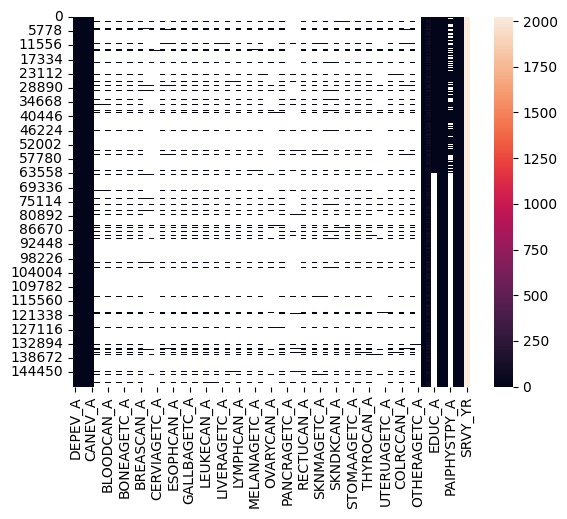

In [ ]:
sns.heatmap(df) # sample check of missing records

In [ ]:
# List of years to iterate over, representing parts of filenames
years = [19, 20, 21, 22, 23]

# Create an empty DataFrame with predefined columns
final_df = pd.DataFrame(columns = columns)

# Loop through each year in the list
for year in years:
  # Construct the filename for the current year
  path = f"/content/adult{year}.csv"

  # Print the filename being processed
  print(path)

  # Read the CSV file into a DataFrame
  df = pd.read_csv(path)

  # Get the list of column names in the current DataFrame
  df_columns = list(df.columns)

  # Ensure all required columns are present in the DataFrame
  for col in columns:
    # If a required column is missing, add it with NaN values
    if col not in df_columns:
      df[col] = np.nan

  # Reorder or select only the required columns
  df = df[columns]

  # Append the current DataFrame to the final DataFrame
  final_df = pd.concat([final_df, df], ignore_index = True)

/content/adult19.csv


/tmp/ipython-input-24-2206603738.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df], ignore_index = True)


/content/adult20.csv
/content/adult21.csv
/content/adult22.csv
/content/adult23.csv


In [ ]:
# save the data to the disk
final_df.to_csv("combined_df.csv", index = False)

In [ ]:
df = pd.read_csv("combined_df.csv") # loading the combined csv as dataframe

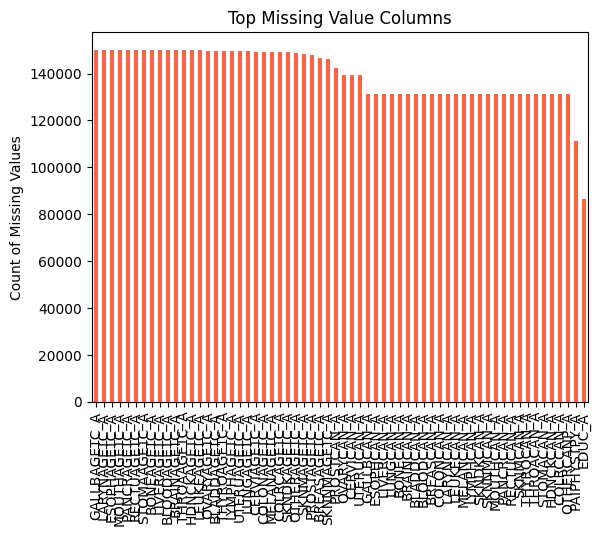

In [ ]:
# 1. Null Value Bar Plot

# Calculate the total number of missing (null) values in each column
nulls = df.isnull().sum()

# Filter to keep only the columns that have at least one missing value, then sort them in descending order
nulls = nulls[nulls > 0].sort_values(ascending=False)

# Plot a bar chart of the missing values using a red ('tomato') color
nulls.plot(kind='bar', color='tomato')

# Set the title of the plot
plt.title("Top Missing Value Columns")

# Label the y-axis to indicate what the bars represent
plt.ylabel("Count of Missing Values")

# Display the plot
plt.show()


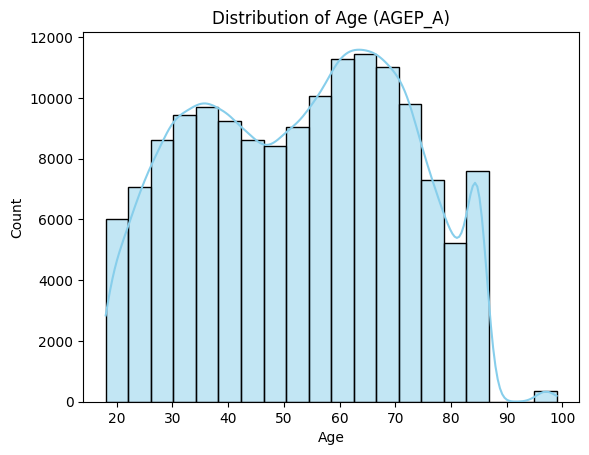

In [ ]:
# 2. Age Distribution

# Create a histogram of the 'AGEP_A' column with 20 bins, a KDE (smoothed curve), and sky blue color
sns.histplot(df['AGEP_A'], bins=20, kde=True, color='skyblue')

# Set the title of the plot
plt.title("Distribution of Age (AGEP_A)")

# Label the x-axis as "Age"
plt.xlabel("Age")

# Label the y-axis as "Count" (frequency of records per age bin)
plt.ylabel("Count")

# Display the plot
plt.show()


/tmp/ipython-input-29-1733753736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX_A', data=df, palette='Set2')


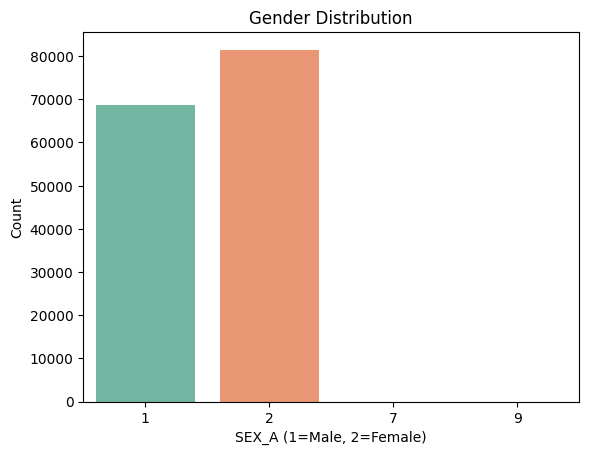

In [ ]:
# 3. Gender Distribution

# Create a count plot (bar chart) for the 'SEX_A' column to show the frequency of each gender
sns.countplot(x='SEX_A', data=df, palette='Set2')

# Set the title of the plot
plt.title("Gender Distribution")

# Label the x-axis to indicate what the codes in 'SEX_A' represent
plt.xlabel("SEX_A (1=Male, 2=Female)")

# Label the y-axis as "Count" to show the number of occurrences for each gender
plt.ylabel("Count")

# Display the plot
plt.show()


/tmp/ipython-input-30-3762492620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEPEV_A', data=df, palette='Set3')


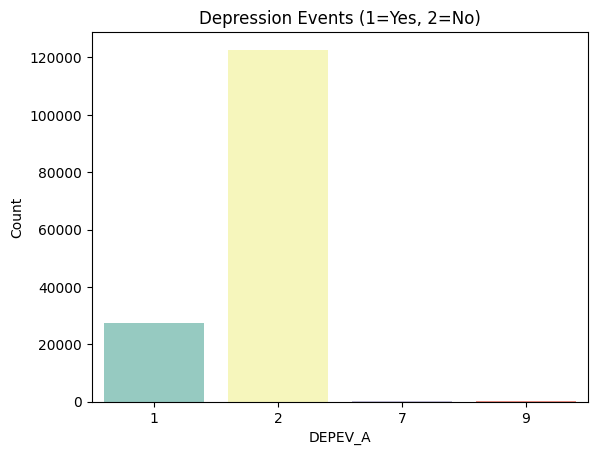

In [ ]:
# 4. Depression Events

# Create a count plot for the 'DEPEV_A' column to visualize how many individuals reported depression events
sns.countplot(x='DEPEV_A', data=df, palette='Set3')

# Set the title of the plot with clarification of what the values mean
plt.title("Depression Events (1=Yes, 2=No)")

# Label the x-axis with the column name
plt.xlabel("DEPEV_A")

# Label the y-axis as "Count" to show how many individuals fall into each category
plt.ylabel("Count")

# Display the plot
plt.show()


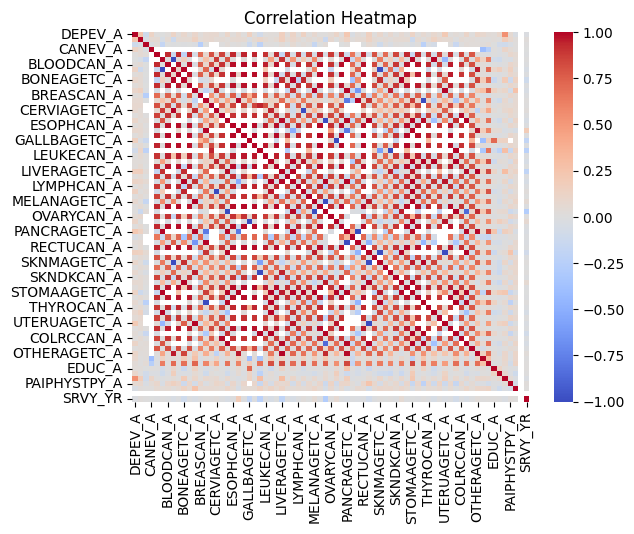

In [ ]:
# 5. Correlation Heatmap for Numeric Features

# Select only the numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=np.number)

# Compute the correlation matrix between all numeric features
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
# 'coolwarm' colormap shows negative correlations in blue and positive in red
# 'center=0' makes 0 correlation the midpoint of the color scale
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


/tmp/ipython-input-32-1748188124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EDUC_A', y='AGEP_A', data=df, palette='Set1')


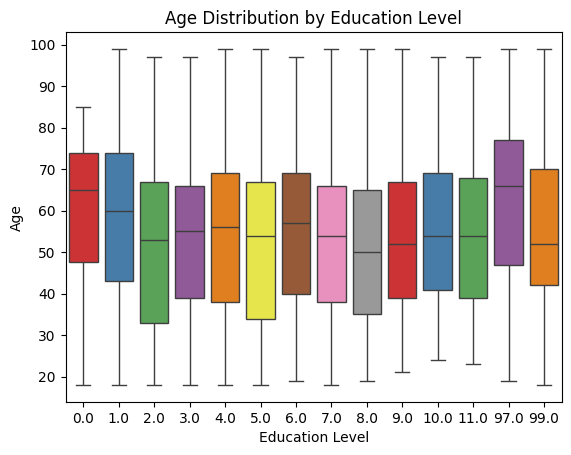

In [ ]:
# 6. Age vs Education Level

# Create a boxplot to show the distribution of age ('AGEP_A') for each education level ('EDUC_A')
# This helps visualize median, quartiles, and potential outliers across education groups
sns.boxplot(x='EDUC_A', y='AGEP_A', data=df, palette='Set1')

# Set the title of the plot
plt.title("Age Distribution by Education Level")

# Label the x-axis as "Education Level" (coded values in 'EDUC_A')
plt.xlabel("Education Level")

# Label the y-axis as "Age"
plt.ylabel("Age")

# Display the plot
plt.show()


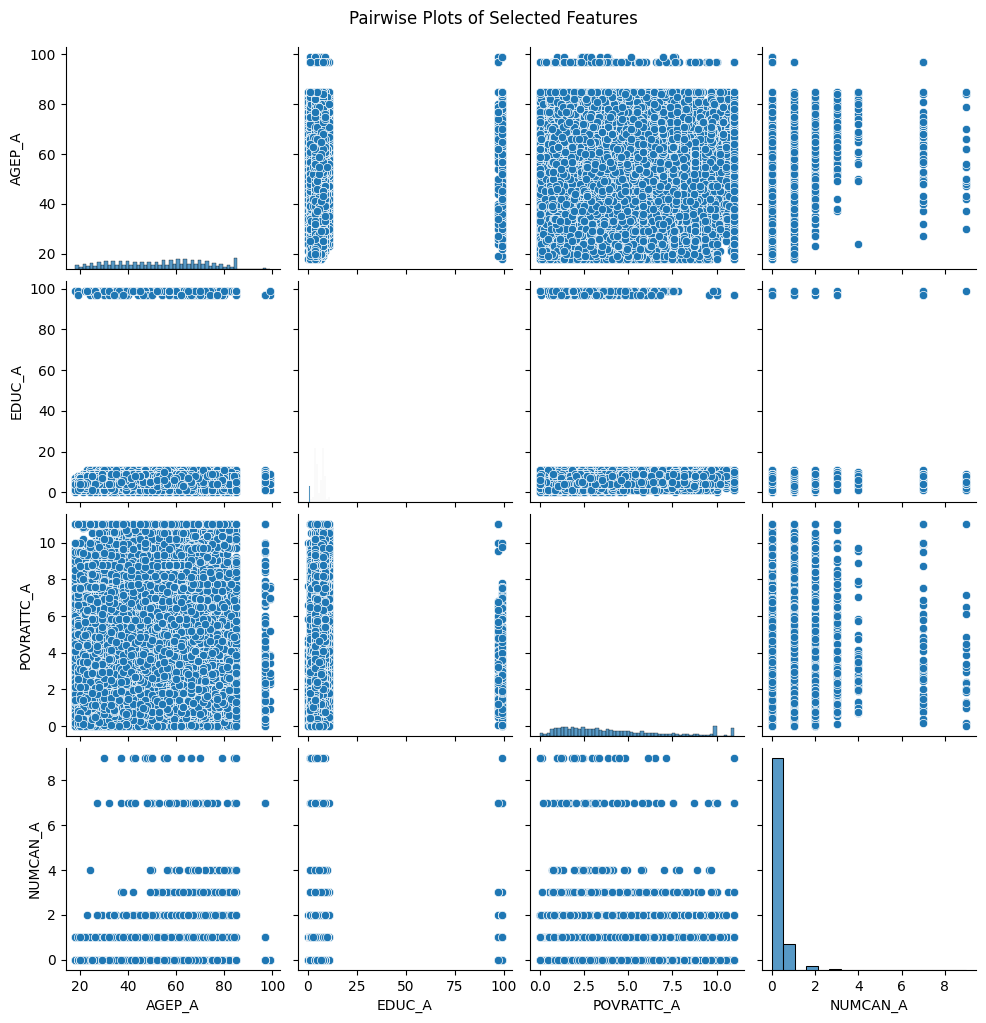

In [ ]:
# 7. Pairplot of Select Features

# Define a list of selected columns to include in the pairplot
selected_cols = ['AGEP_A', 'EDUC_A', 'POVRATTC_A', 'NUMCAN_A']

# Create a pairplot to visualize pairwise relationships between selected numeric features
# Drop rows with missing values to avoid plotting issues
sns.pairplot(df[selected_cols].dropna())

# Set the overall title of the pairplot and adjust its vertical position using 'y'
plt.suptitle("Pairwise Plots of Selected Features", y=1.02)

# Display the plot
plt.show()


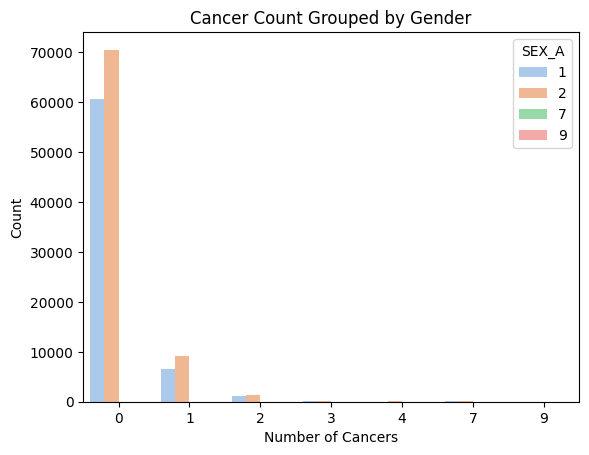

In [ ]:
# 8. Cancer Count by Gender

# Create a count plot showing the number of cancer cases ('NUMCAN_A'),
# grouped (stacked side-by-side) by gender ('SEX_A') using different hues
sns.countplot(x='NUMCAN_A', hue='SEX_A', data=df, palette='pastel')

# Set the title of the plot
plt.title("Cancer Count Grouped by Gender")

# Label the x-axis to indicate it represents the number of cancer diagnoses
plt.xlabel("Number of Cancers")

# Label the y-axis to show the count of individuals in each group
plt.ylabel("Count")

# Display the plot
plt.show()


/tmp/ipython-input-35-315590970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ANXEV_A', y='AGEP_A', data=df, palette='muted')


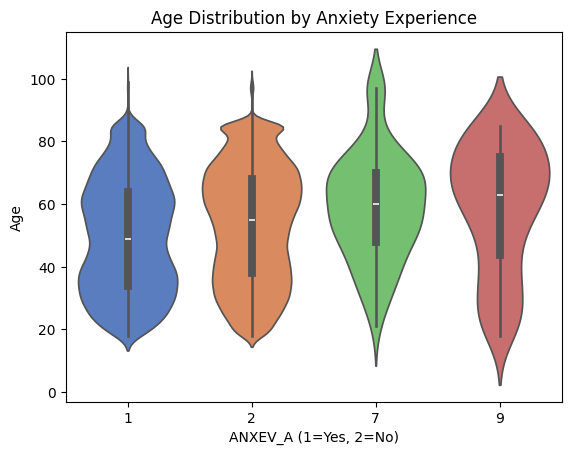

In [ ]:
# 9. Age Distribution by Anxiety (if present)

# Check if the 'ANXEV_A' column (anxiety experience indicator) exists in the DataFrame
if 'ANXEV_A' in df.columns:

    # Create a violin plot to show the distribution of age ('AGEP_A') for each anxiety group ('ANXEV_A')
    # A violin plot combines boxplot and KDE to show data distribution more fully
    sns.violinplot(x='ANXEV_A', y='AGEP_A', data=df, palette='muted')

    # Set the title of the plot
    plt.title("Age Distribution by Anxiety Experience")

    # Label the x-axis to indicate what 'ANXEV_A' represents
    plt.xlabel("ANXEV_A (1=Yes, 2=No)")

    # Label the y-axis as "Age"
    plt.ylabel("Age")

    # Display the plot
    plt.show()


In [ ]:
# 10. Summary of Nulls

# Calculate the number of missing values per column
null_summary = df.isnull().sum().reset_index()

# Rename the columns for clarity: 'index' to 'Column', and the sums to 'Missing_Values'
null_summary.columns = ['Column', 'Missing_Values']

# Calculate the percentage of missing values relative to the total number of rows
null_summary['% Missing'] = 100 * null_summary['Missing_Values'] / len(df)

# Filter to keep only columns that have at least one missing value
null_summary = null_summary[null_summary['Missing_Values'] > 0]

# Sort the columns by percentage of missing values in descending order
# Show the top 10 columns with the most missing data
null_summary.sort_values(by='% Missing', ascending=False).head(10)


,Column,Missing_Values,% Missing
21,GALLBAGETC_A,150200,99.986686
23,LARYNAGETC_A,150195,99.983358
19,ESOPHAGETC_A,150148,99.952070
35,MOUTHAGETC_A,150141,99.947410
39,PANCRAGETC_A,150130,99.940088
43,RECTUAGETC_A,150118,99.932100
51,STOMAAGETC_A,150117,99.931434
9,BONEAGETC_A,150100,99.920117
27,LIVERAGETC_A,150099,99.919451
7,BLOODAGETC_A,150098,99.918786


In [ ]:
# Clean Age column if needed
df['AGEP_A'] = pd.to_numeric(df['AGEP_A'], errors='coerce')

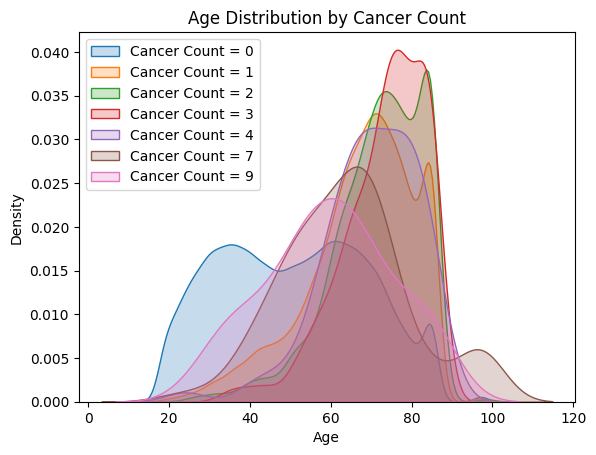

In [ ]:
# KDE Plot: Age Distribution by Cancer Count

# Check if both 'AGEP_A' (Age) and 'NUMCAN_A' (Number of Cancers) columns exist in the DataFrame
if 'AGEP_A' in df.columns and 'NUMCAN_A' in df.columns:

    # Loop through each unique cancer count value in ascending order, ignoring missing values
    for val in sorted(df['NUMCAN_A'].dropna().unique()):

        # Filter the DataFrame for rows where cancer count equals the current value
        subset = df[df['NUMCAN_A'] == val]

        # Proceed only if the age data in this subset is not empty after dropping missing values
        if not subset['AGEP_A'].dropna().empty:

            # Plot the Kernel Density Estimate (KDE) for the age distribution of this subset
            # 'fill=True' fills the area under the curve, and label differentiates the groups
            sns.kdeplot(subset['AGEP_A'].dropna(), label=f'Cancer Count = {val}', fill=True)

    # Set the title of the plot
    plt.title("Age Distribution by Cancer Count")

    # Label the x-axis as Age
    plt.xlabel("Age")

    # Label the y-axis as Density (probability density of age)
    plt.ylabel("Density")

    # Display the legend to identify cancer count groups
    plt.legend()

    # Show the plot
    plt.show()


In [ ]:
# Categorical Column Distributions

# Select columns with data type 'object' (categorical/string columns)
categorical_cols = df.select_dtypes(include='object').columns

# Loop through the first 5 categorical columns (to avoid too many plots)
for col in categorical_cols[:5]:

    # Create a new figure for each plot
    plt.figure()

    # Plot a bar chart of the value counts for the current categorical column
    # Include missing values (NaNs) in the counts
    df[col].value_counts(dropna=False).plot(kind='bar')

    # Set the title of the plot dynamically based on the column name
    plt.title(f"Distribution of {col}")

    # Label the x-axis with the column name
    plt.xlabel(col)

    # Label the y-axis as "Count" representing the frequency of each category
    plt.ylabel("Count")

    # Rotate x-axis labels by 45 degrees for better readability
    plt.xticks(rotation=45)

    # Adjust the plot layout to prevent label overlap
    plt.tight_layout()

    # Display the plot
    plt.show()


In [ ]:
# Top 10 columns with most missing values

# Calculate the number of missing values in each column and reset the index to convert Series to DataFrame
missing_summary = df.isnull().sum().reset_index()

# Rename the columns for clarity: 'index' to 'Column' and missing counts to 'Missing_Values'
missing_summary.columns = ['Column', 'Missing_Values']

# Calculate the percentage of missing values for each column relative to total rows
missing_summary['% Missing'] = 100 * missing_summary['Missing_Values'] / len(df)

# Sort the DataFrame by '% Missing' in descending order and print the top 10 columns with the most missing values
print(missing_summary.sort_values(by='% Missing', ascending=False).head(10))


          Column  Missing_Values  % Missing
21  GALLBAGETC_A          150200  99.986686
23  LARYNAGETC_A          150195  99.983358
19  ESOPHAGETC_A          150148  99.952070
35  MOUTHAGETC_A          150141  99.947410
39  PANCRAGETC_A          150130  99.940088
43  RECTUAGETC_A          150118  99.932100
51  STOMAAGETC_A          150117  99.931434
9    BONEAGETC_A          150100  99.920117
27  LIVERAGETC_A          150099  99.919451
7   BLOODAGETC_A          150098  99.918786


In [ ]:
# Print a message indicating the start of column name listing
print("Column names in the dataset:")

# Print the list of column names in the DataFrame 'df'
# The .columns attribute returns an Index object; .tolist() converts it to a regular Python list
print(df.columns.tolist())

Column names in the dataset:
['DEPEV_A', 'DEPMED_A', 'SEX_A', 'CANEV_A', 'BLADDCAN_A', 'BLADDAGETC_A', 'BLOODCAN_A', 'BLOODAGETC_A', 'BONECAN_A', 'BONEAGETC_A', 'BRAINCAN_A', 'BRAINAGETC_A', 'BREASCAN_A', 'BREASAGETC_A', 'CERVICAN_A', 'CERVIAGETC_A', 'COLONCAN_A', 'COLONAGETC_A', 'ESOPHCAN_A', 'ESOPHAGETC_A', 'GALLBCAN_A', 'GALLBAGETC_A', 'LARYNCAN_A', 'LARYNAGETC_A', 'LEUKECAN_A', 'LEUKEAGETC_A', 'LIVERCAN_A', 'LIVERAGETC_A', 'LUNGCAN_A', 'LUNGAGETC_A', 'LYMPHCAN_A', 'LYMPHAGETC_A', 'MELANCAN_A', 'MELANAGETC_A', 'MOUTHCAN_A', 'MOUTHAGETC_A', 'OVARYCAN_A', 'OVARYAGETC_A', 'PANCRCAN_A', 'PANCRAGETC_A', 'PROSTCAN_A', 'PROSTAGETC_A', 'RECTUCAN_A', 'RECTUAGETC_A', 'SKNMCAN_A', 'SKNMAGETC_A', 'SKNNMCAN_A', 'SKNNMAGETC_A', 'SKNDKCAN_A', 'SKNDKAGETC_A', 'STOMACAN_A', 'STOMAAGETC_A', 'THROACAN_A', 'THROAAGETC_A', 'THYROCAN_A', 'THYROAGETC_A', 'UTERUCAN_A', 'UTERUAGETC_A', 'HDNCKCAN_A', 'HDNCKAGETC_A', 'COLRCCAN_A', 'COLRCAGETC_A', 'OTHERCANP_A', 'OTHERAGETC_A', 'NUMCAN_A', 'AGEP_A', 'EDUC_A', 

In [ ]:
# Show sample rows
print("\nSample rows:")
print(df.head())



Sample rows:
   DEPEV_A  DEPMED_A  SEX_A  CANEV_A  BLADDCAN_A  BLADDAGETC_A  BLOODCAN_A  \
0        2         2      1        2         NaN           NaN         NaN   
1        2         2      2        2         NaN           NaN         NaN   
2        2         2      1        1         1.0          62.0         2.0   
3        2         2      1        2         NaN           NaN         NaN   
4        1         1      1        2         NaN           NaN         NaN   

   BLOODAGETC_A  BONECAN_A  BONEAGETC_A  ...  OTHERAGETC_A  NUMCAN_A  AGEP_A  \
0           NaN        NaN          NaN  ...           NaN         0      97   
1           NaN        NaN          NaN  ...           NaN         0      28   
2           NaN        2.0          NaN  ...           NaN         1      72   
3           NaN        NaN          NaN  ...           NaN         0      60   
4           NaN        NaN          NaN  ...           NaN         0      60   

   EDUC_A  POVRATTC_A  ANXEV_A  PAIP

In [ ]:
df = df[df['DEPEV_A'].isin([1, 2])]

# Drop columns with more than 50% missing
df = df.dropna(thresh=len(df) * 0.5, axis=1)

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
# Numeric
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# If categorical columns exist
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
# Create the target variable 'y' by extracting the 'DEPEV_A' column from the DataFrame
# Replace the values: 1 stays as 1 (indicating presence of depression), 2 becomes 0 (indicating absence)
# This is likely done to prepare for binary classification (1 = yes, 0 = no)

y = df['DEPEV_A'].replace({1: 1, 2: 0})


# Create the feature matrix 'X' by dropping unnecessary or target-related columns from the DataFrame
# 'DEPEV_A' is dropped since it's the target variable
# 'RECTYPE' and 'SRVY_YR' are also dropped, possibly because they are identifiers or not useful for modeling

X = df.drop(columns=['DEPEV_A', 'RECTYPE', 'SRVY_YR'])

In [ ]:
# Import train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Import logistic regression model for classification
from sklearn.linear_model import LogisticRegression


# Import decision tree classifier for classification tasks
from sklearn.tree import DecisionTreeClassifier


# Import random forest classifier, an ensemble method that builds multiple decision trees
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics to assess model performance:
# - accuracy_score: proportion of correct predictions
# - precision_score: proportion of positive identifications that were actually correct
# - recall_score: proportion of actual positives that were identified correctly
# - f1_score: harmonic mean of precision and recall
# - roc_auc_score: Area Under the Receiver Operating Characteristic Curve
# - confusion_matrix: summary table showing TP, FP, FN, TN
# - ConfusionMatrixDisplay: utility to visually display a confusion matrix
# - RocCurveDisplay: utility to visually display the ROC curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
# Convert categorical variables into dummy/indicator variables using one-hot encoding
# drop_first=True avoids the dummy variable trap by dropping the first category of each variable
X = pd.get_dummies(X, drop_first=True)


# Initialize the StandardScaler to normalize the feature data
# This will scale each feature to have zero mean and unit variance
scaler = StandardScaler()


# Fit the scaler on the data and transform it, resulting in a scaled version of X
X_scaled = scaler.fit_transform(X)

# Display the original (unscaled) DataFrame X with one-hot encoded columns
X


,DEPMED_A,SEX_A,CANEV_A,NUMCAN_A,AGEP_A,POVRATTC_A,ANXEV_A,UPPSLFCR_A
0,2.0,1.0,2.0,0.0,97.0,2.96,2.0,1.0
1,2.0,2.0,2.0,0.0,28.0,2.97,2.0,1.0
2,2.0,1.0,1.0,1.0,72.0,4.28,2.0,1.0
3,2.0,1.0,2.0,0.0,60.0,7.13,2.0,1.0
4,1.0,1.0,2.0,0.0,60.0,1.13,1.0,1.0
...,...,...,...,...,...,...,...,...
150215,2.0,2.0,2.0,0.0,77.0,1.63,2.0,1.0
150216,1.0,2.0,2.0,0.0,59.0,9.18,2.0,1.0
150217,2.0,1.0,2.0,0.0,66.0,7.91,2.0,1.0
150218,2.0,2.0,2.0,0.0,53.0,4.33,2.0,1.0


In [ ]:
# Split the scaled features (X_scaled) and target variable (y) into training and testing sets
# test_size=0.2 indicates 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split (so you get the same result each time)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression

# Initialize the Logistic Regression model
# max_iter=1000 sets the maximum number of iterations for the solver to converge
# This is useful if the default (usually 100) is too low for convergence
log_model = LogisticRegression(max_iter=1000)

log_model = LogisticRegression(max_iter=1000)

# Fit (train) the logistic regression model using the training data
# X_train contains the feature data, y_train contains the target labels
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Decision Tree

# Initialize the Decision Tree Classifier using default parameters
tree_model = DecisionTreeClassifier()


# Train (fit) the decision tree model on the training dataset
# X_train: features, y_train: target labels
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Random Forest
# Initialize the Random Forest Classifier using default parameters
# Random Forest is an ensemble learning method that builds multiple decision trees and combines their results
rf_model = RandomForestClassifier()


# Train (fit) the random forest model on the training dataset
# X_train contains the input features, and y_train contains the target labels
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:

# Define a function to evaluate a trained classification model
# Parameters:
#   name: a string to identify the model being evaluated
#   model: the trained model object (e.g., LogisticRegression, DecisionTreeClassifier)
def evaluate_model(name, model):

  # Generate predictions on the test set
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")  # Print model name
    print("Accuracy:", accuracy_score(y_test, y_pred)) # Proportion of correct predictions
    print("Precision:", precision_score(y_test, y_pred)) # True positives / predicted positives
    print("Recall:", recall_score(y_test, y_pred)) # True positives / actual positives
    print("F1 Score:", f1_score(y_test, y_pred)) # Harmonic mean of precision and recall
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1])) # ROC AUC: Measures how well the model separates classes; uses predicted probabilities for positive class




    # Create and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()  # Show the confusion matrix plot

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)


Logistic Regression Evaluation:
Accuracy: 0.8890333766796705
Precision: 0.7765081052351847
Recall: 0.5402107598447032
F1 Score: 0.6371565634539904
ROC AUC: 0.8754280461909557

Decision Tree Evaluation:
Accuracy: 0.8721283051582142
Precision: 0.6580956207312173
Recall: 0.6056572379367721
F1 Score: 0.6307884856070087
ROC AUC: 0.7698843126289532

Random Forest Evaluation:
Accuracy: 0.8903004234603714
Precision: 0.7157401751170841
Recall: 0.6498428545017564
F1 Score: 0.6812015503875969
ROC AUC: 0.8697769429956691


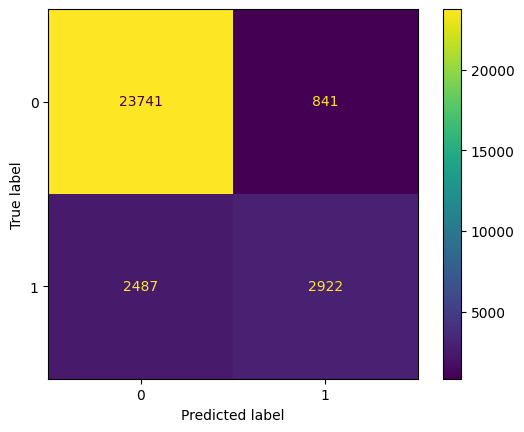

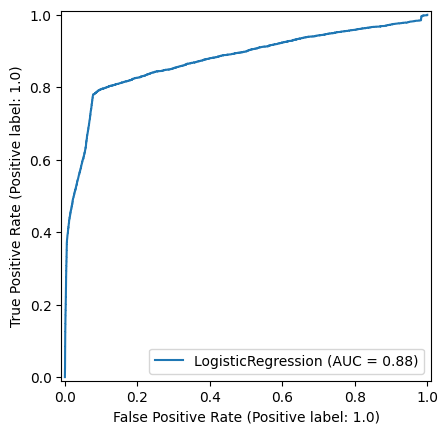

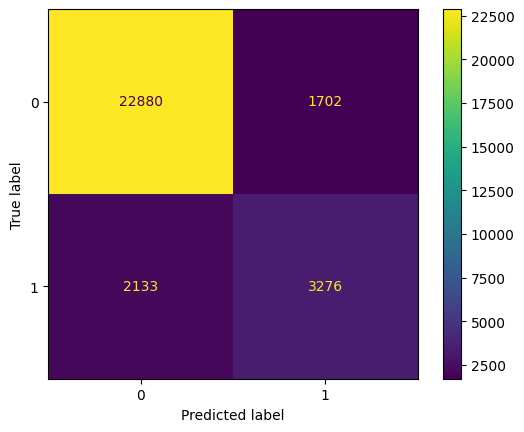

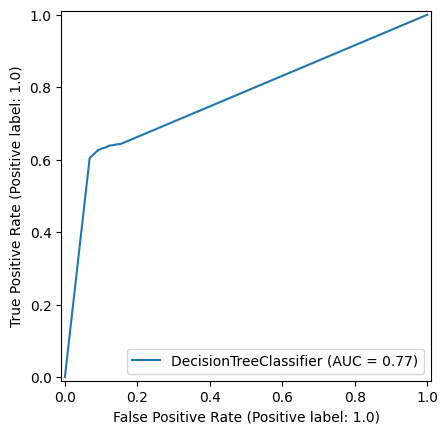

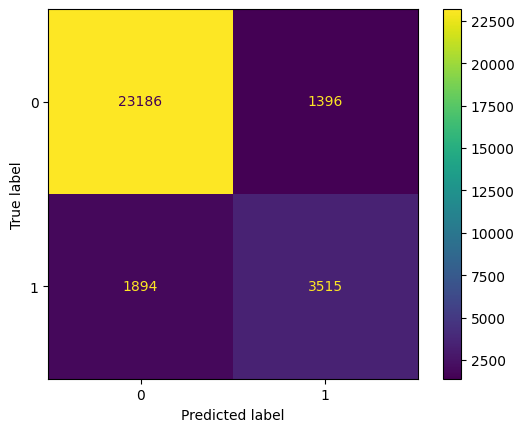

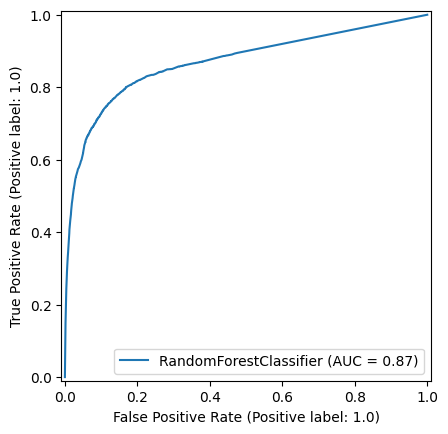

In [ ]:
# 8. Evaluate all models
# Evaluate the Logistic Regression model using the evaluation function
evaluate_model("Logistic Regression", log_model)

# Evaluate the Decision Tree model using the evaluation function
evaluate_model("Decision Tree", tree_model)

# Evaluate the Random Forest model using the evaluation function
evaluate_model("Random Forest", rf_model)

In [ ]:
new_df = pd.read_csv("/content/combined_df.csv")

new_df.head()

,DEPEV_A,DEPMED_A,SEX_A,CANEV_A,BLADDCAN_A,BLADDAGETC_A,BLOODCAN_A,BLOODAGETC_A,BONECAN_A,BONEAGETC_A,...,OTHERAGETC_A,NUMCAN_A,AGEP_A,EDUC_A,POVRATTC_A,ANXEV_A,PAIPHYSTPY_A,UPPSLFCR_A,RECTYPE,SRVY_YR
0,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,97,7.0,2.96,2,2.0,1,10,2019
1,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,28,6.0,2.97,2,NaN,1,10,2019
2,2,2,1,1,1.0,62.0,2.0,NaN,2.0,NaN,...,NaN,1,72,5.0,4.28,2,2.0,1,10,2019
3,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,60,7.0,7.13,2,2.0,1,10,2019
4,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,60,5.0,1.13,1,2.0,1,10,2019


In [ ]:
from sklearn.metrics import classification_report

# Define target
# We chose target variable as Difficulty with Self care
target = 'UPPSLFCR_A'

# Identify cancer type columns (ending with _CAN_A)
cancer_columns = ["BLOODCAN_A","BONECAN_A","STOMACAN_A","SKNDKCAN_A","RECTUCAN_A","PROSTCAN_A","MOUTHCAN_A"]


# Drop rows with missing target
new_df = new_df.dropna(subset=[target])

# Loop over each cancer type
for cancer_col in cancer_columns:
    # Select rows where this cancer is present
    subgroup = new_df[new_df[cancer_col] == 1]

    if len(subgroup) < 50:
        print(f"\nSkipping {cancer_col}: Not enough samples ({len(subgroup)})")
        continue

    # Use all features except cancer flags and the target
    feature_cols = new_df.columns.difference([target] + cancer_columns)

    X = subgroup[feature_cols].fillna(0)
    y = subgroup[target]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    print(f"\n=== Subgroup: {cancer_col} ===")
    print(classification_report(y_test, y_pred))




=== Subgroup: BLOODCAN_A ===
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        22
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1

    accuracy                           0.88        25
   macro avg       0.29      0.33      0.31        25
weighted avg       0.77      0.88      0.82        25



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Subgroup: BONECAN_A ===
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        18
           2       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.75        24
   macro avg       0.25      0.33      0.29        24
weighted avg       0.56      0.75      0.64        24


=== Subgroup: STOMACAN_A ===
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           3       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


=== Subgroup: SKNDKCAN_A ===
              precision    recall  f1-score   support

           1       0.90      1.00      0.95       197
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.90       218
   macro avg       0.23      0.25      0.24       218
weighted avg       0.82      0.90      0.86       218


=== Subgroup: RECTUCAN_A ===
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


=== Subgroup: PROSTCAN_A ===
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       423
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.90       469
   macro avg       0.23      0.25      0.24       469
weighted avg       0.81      0.90      0.85       469


=== Subgroup: MOUTHCAN_A ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
